# Problem set 7
### Group14：
Qi Chen<br/>Besar Vatoci<br/>Jacob Stoltzfus

### The aim of this exercise: compare prediction properties of the linear regression model with a regression tree.


In [5]:
install.packages("rsample")     # data splitting 
install.packages("dplyr")       # data wrangling
install.packages("tree")        # performing regression trees or
install.packages("rpart")       # performing regression trees
install.packages("rpart.plot")  # plotting regression trees
install.packages("ipred")       # bagging
install.packages("caret")       # bagging
library(tree)
library(rpart)
library(rpart.plot)

Installing package into 'C:/Users/77/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'rsample' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\77\AppData\Local\Temp\RtmpIF519S\downloaded_packages


Installing package into 'C:/Users/77/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\77\AppData\Local\Temp\RtmpIF519S\downloaded_packages


Warning message:
"package 'tree' is in use and will not be installed"
Warning message:
"package 'rpart' is in use and will not be installed"
Warning message:
"package 'rpart.plot' is in use and will not be installed"
Installing package into 'C:/Users/77/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'ipred' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\77\AppData\Local\Temp\RtmpIF519S\downloaded_packages


Installing package into 'C:/Users/77/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\77\AppData\Local\Temp\RtmpIF519S\downloaded_packages


# Exercise 1
Consider the following data generating process in which we have n = 100 observations and two covariates
$X_{1} \sim \mathcal{N}(0,4)$ and $X_{2} \sim \mathcal{N}(0,4)$. 
$y_{i}$ is generated by some nonlinear function of $X$ of your choice.

- Generate the data according to the dgp described above and fit a regression tree.
- Use a newly generated test data set to calculate the mean squared error using a naive linear regression
  model and compare with a full tree and an optimally pruned tree.



## A bit of theory



In [95]:
rm(list = ls())
set.seed(2777)

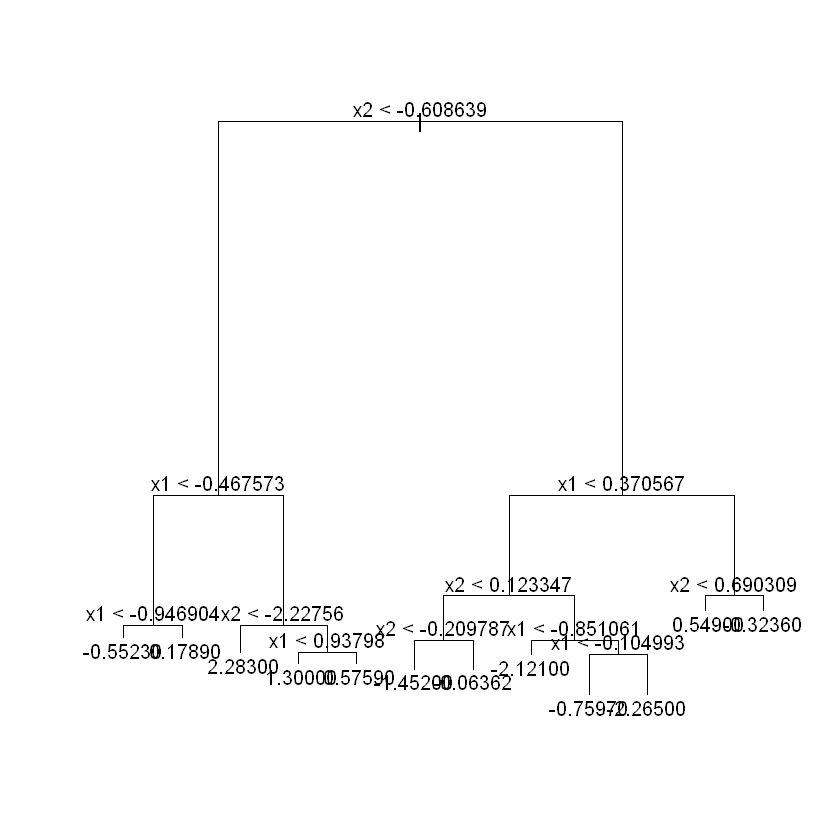

In [96]:
#============Data generating process============#
n <- 100
beta <- c(1, -0.5)
mu <- 0
sigma <- 2

dgp <- function(n, mu, sigma){
  
  x1 <- sin(rnorm(n, mu, sigma))
  x2 <- rnorm(n, mu, sigma)
  X <- cbind(x1, x2)
  eps <- rnorm(n, 0, 1)
  
  y <-  X %*% beta + eps
  data <- cbind(y, X)
  data <- data.frame("y" = y, "x1" = x1, "x2" = x2)
  
  return(data)
}

#===fitting a regression tree and linear model====#
data_train <- dgp(n, mu, sigma)

fit_tree <- tree(y ~., data = data_train)
fit_lm <- lm(y ~., data = data_train)
plot(fit_tree)
text(fit_tree, pretty = 0)


In [97]:
#============generating a new test dataset========#
data_test <- dgp(n, mu, sigma)

#============predicting===========================#
test_tree <- predict(fit_tree, newdata = data_test)
test_lm <- predict(fit_lm, newdata = data_test)

#============calculating mse======================#
mse_tree <- mean((test_tree - data_test$y) ^ 2)
mse_lm <- mean((test_lm - data_test$y) ^ 2)
mse_tree
mse_lm

[1] 1.658983

[1] 0.9330981

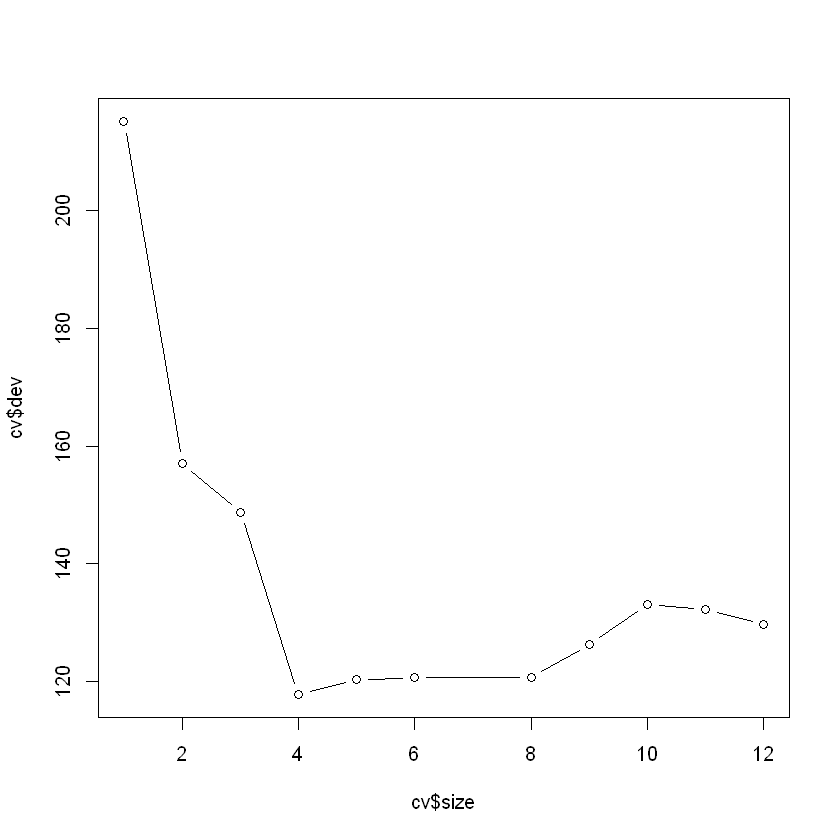

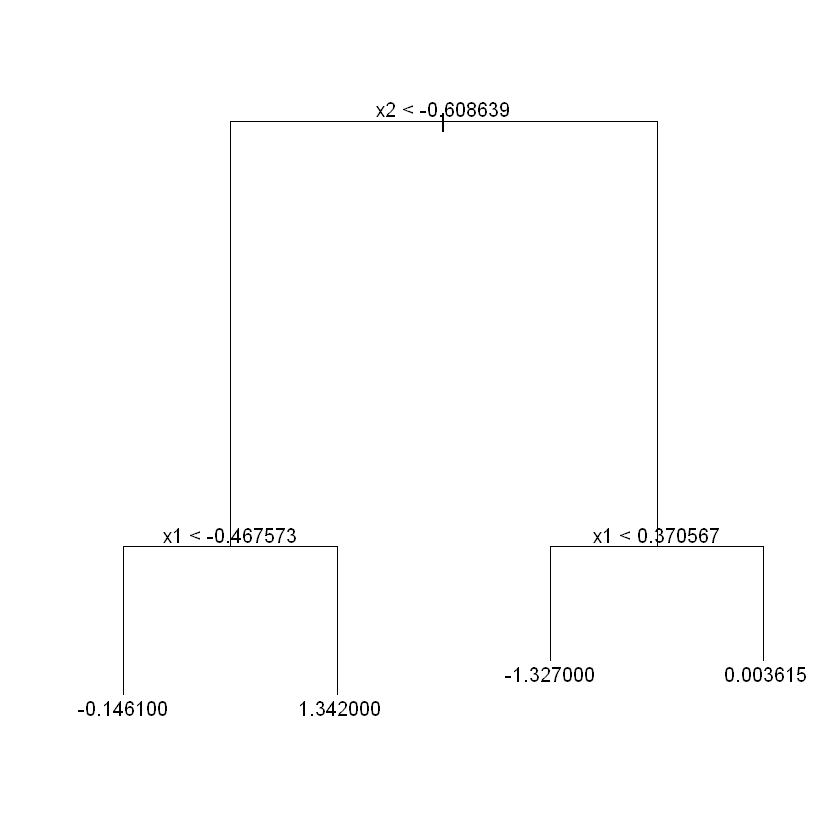

In [112]:
#============pruning the tree=====================#
cv <- cv.tree(fit_tree, K = 10)
plot(cv$size, cv$dev, type = "b")
ptree <- prune.tree(fit_tree, best = 4) 
plot(ptree)
text(ptree, pretty = 0)

In [109]:
#======calculating the pruned tree's mse==========#
test_ptree <- predict(ptree, newdata = data_test)
mse_ptree <- mean((test_ptree - data_test$y) ^ 2)
mse_ptree


min <- mse_lm


if(min > mse_tree){
  min <- mse_tree
} else if(min > mse_ptree){
  min <- mse_ptree
  print(paste("MSE for full tree model is", round(mse_tree, 3),
    ",MSE for linear model is", round(mse_lm , 3),
    ",MSE for pruned tree model is", round(mse_ptree, 3),
    ",in this case pruned tree model performs well"))
} else{
  print(paste("MSE for full tree model is", round(mse_tree, 3),
             ",MSE for linear model is", round(mse_lm , 3),
             ",MSE for pruned tree model is", round(mse_ptree, 3),
             ",in this case linear model performs well"))
  
}
   

[1] 1.445927

[1] "MSE for full tree model is 1.659 ,MSE for linear model is 0.933 ,MSE for pruned tree model is 1.446 ,in this case linear model performs well"


# Exercise 2 (Simulation Study):

The goal here is to think about how a regression tree makes its predictions and consequently when a regression
tree might yield a better result than other methods.
- Propose a dgp that will be well suited for analysis using regression trees and evaluate relevant properties
in a small simulation study.
- Propose a dgp that will be well suited for analysis using the linear regression model (i.e. where the linear
regression model is more likely to “beat" the regression tree method) and evaluate.
- Show how pruning reduces the variance of the regression tree prediction.

## Trees Versus Linear Models
Regression and classification trees have a very different flavor from the more classical approaches for regression and classification methods already discussed before. 
Which model is better? It depends on the problem at hand. If the relationship between the features and the response is well approximated by a linear model, then an approach such as linear regression will likely work well, and will outperform a method such as a regression tree that does not exploit this linear structure. If instead there is a highly non-linear and complex relationship between the features and the response, then decision trees may outperform classical approaches.

In [1]:
# We would propose a data generating process where y is dependent by 3 or 4 covariates, which many not be 
# a linear combination of these cavariates.

# Data generating process

dgp1 <- function(n){
  X1 <- rnorm(n, m, sd)
  X2 <- rnorm(n, m, sd)
  X3 <- rnorm(n, m, sd)
  X4 <- rnorm(n, m, sd)  
  eps <- rnorm(n, 0 ,1)
  yi <- 2* X1 * X2 + X3 + ((X4)^2) + eps
  data <- data.frame("yi" = yi, "X1" = X1, "X2" = X2,"X3" = X3, "X4" = X4, "eps" = eps)
  return(data)
}


Call:
lm(formula = yi ~ ., data = data_train)

Coefficients:
(Intercept)           X1           X2           X3           X4          eps  
     3.9915      -0.4904      -0.5506       1.1348       0.7715       2.1449  


[1] 121.1962

[1] 73.68547

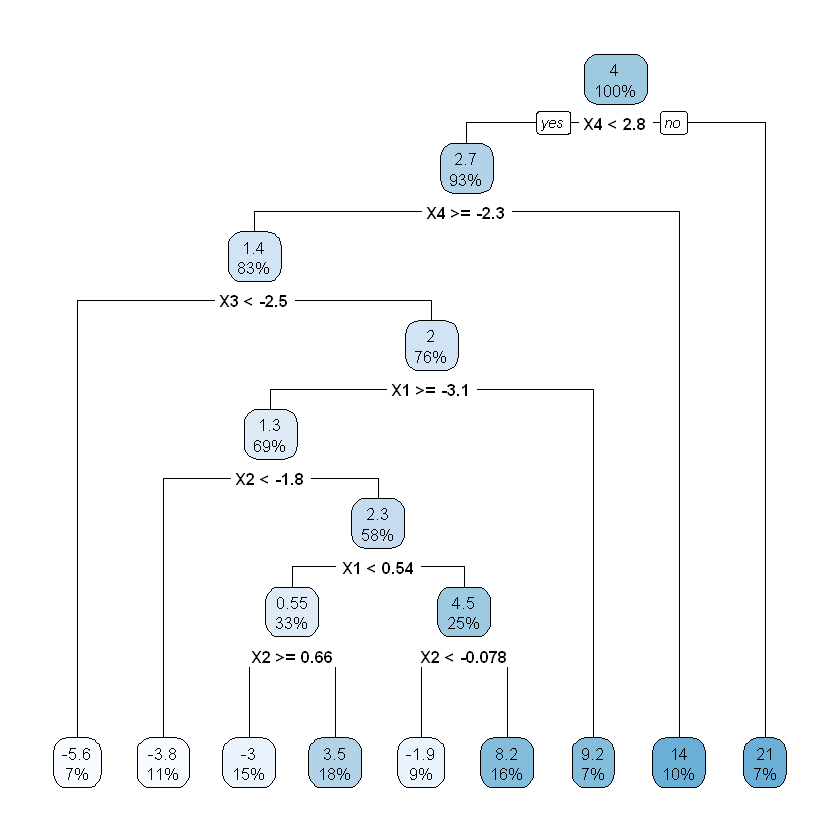

In [10]:
#Fitting a regression tree

n <- 100
m <- 0
sd <- 2


#fiting the regression tree
set.seed(134)
data_train <- dgp1(n)
model1 <- rpart(formula = yi~., 
              data = data_train,
              
              method = "anova")
rpart.plot(model1)

model2 <- lm(yi~.,data = data_train)
model2

mse_model2 <- mean(model2$residuals^2)

mse_tree <- mean(residuals(model1)^2)
mse_model2
mse_tree


 Now we propose a dgp that will be well suited for analysis using the linear regression model  (i.e. where the linear regression model is more likely to “beat" the regression tree method) and evaluate.

In [29]:
# We would propose a data generating process where y is dependent by 3 or 4 covariates, and we have a linear combination of these cavariates.

# Data generating process

dgp2 <- function(n){
  X1 <- rnorm(n, m, sd)
  X2 <- rnorm(n, m, sd)
  X3 <- rnorm(n, m, sd)
  X4 <- rnorm(n, m, sd) 
  beta <- c(0.6,1.3,-0.5, 2.43)
  X<- cbind(X1,X2,X3,X4)  
  eps <- rnorm(n, 0 ,1)
   Y <- X %*% beta + eps
  data <- data.frame("Y" = Y, "X1" = X1, "X2" = X2,"X3" = X3, "X4" = X4, "eps" = eps)
  return(data)
}


Call:
lm(formula = Y ~ ., data = data1)

Coefficients:
(Intercept)           X1           X2           X3           X4          eps  
  3.997e-16    6.000e-01    1.300e+00   -5.000e-01    2.430e+00    1.000e+00  


[1] 2.419752e-30

[1] 5.805047

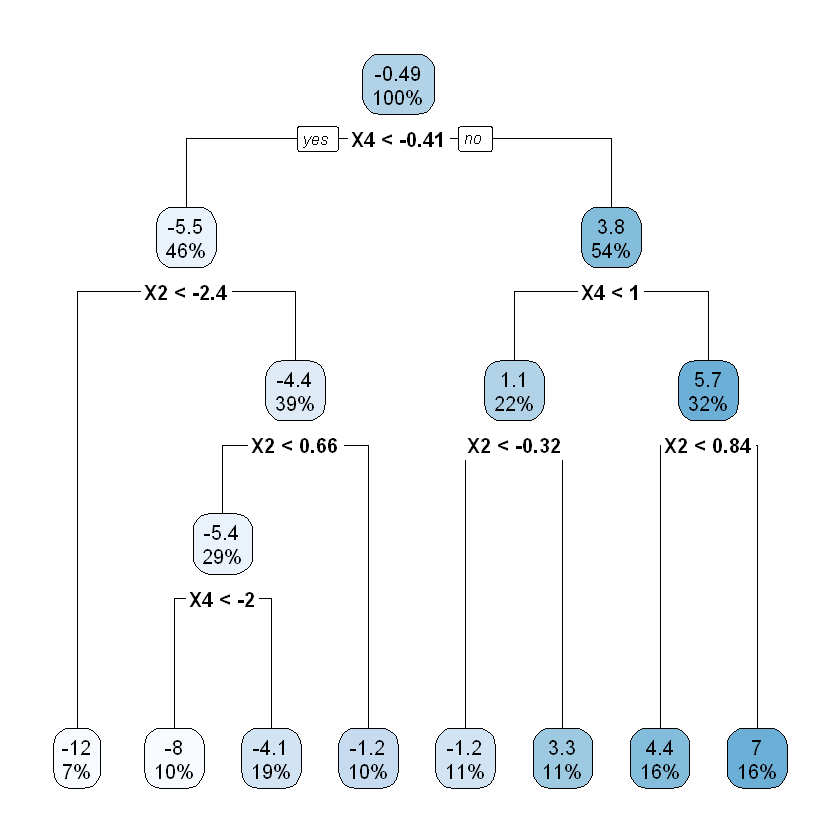

In [32]:
# Fitting the regression tree model
n <- 100
m <- 0
sd <- 2


set.seed(101)
data1 <-dgp2(n)
model3 <- rpart(formula = Y~.,
               data = data1,
               control = (cp=0),
               method = 'anova')

model4 <- lm(Y~., data = data1)
model4
rpart.plot(model3)

mse_model4 <- mean(model4$residuals^2)

mse_tree1 <- mean(residuals(model3)^2)
mse_model4
mse_tree1




